In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor


c:\Users\DELL\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loading data

In [2]:

# Load your data
df = pd.read_csv('data/merged_data.csv')  # Replace with your actual data file

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\605505107.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/merged_data.csv')  # Replace with your actual data file


In [3]:
df.head()

,Unnamed: 0,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),rain (mm),snowfall (cm),snow_depth (m),surface_pressure (hPa),...,soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,date,is_holiday
0,2020-01-01 00:00:00,-0.2,99,-0.3,-2.7,0.0,0.0,0.0,0.0,1027.3,...,0.385,0.383,0.288,42.9,0.718,15.7,73.1,64.4,2020-01-01 00:00:00,True
1,2020-01-01 01:00:00,2.6,98,2.3,0.3,0.0,0.0,0.0,0.0,1026.9,...,0.386,0.383,0.288,33.6,0.587,10.1,74.8,66.0,2020-01-01 01:00:00,True
2,2020-01-01 02:00:00,2.1,100,2.0,-0.3,0.0,0.0,0.0,0.0,1026.6,...,0.386,0.383,0.288,29.3,NaN,5.1,51.0,44.9,2020-01-01 02:00:00,True
3,2020-01-01 03:00:00,1.9,100,1.9,-0.7,0.0,0.0,0.0,0.0,1026.5,...,0.386,0.383,0.288,30.5,0.246,7.2,27.7,25.1,2020-01-01 03:00:00,True
4,2020-01-01 04:00:00,2.2,98,1.9,-0.7,0.0,0.0,0.0,0.0,1026.0,...,0.386,0.383,0.288,29.3,0.204,8.3,15.3,13.6,2020-01-01 04:00:00,True


In [4]:
df.rename(columns={df.columns[0]: 'id'}, inplace=True)


In [5]:
df.columns

Index(['id', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
       'dew_point_2m (°C)', 'apparent_temperature (°C)', 'precipitation (mm)',
       'rain (mm)', 'snowfall (cm)', 'snow_depth (m)',
       'surface_pressure (hPa)', 'cloud_cover (%)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'wind_gusts_10m (km/h)',
       'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'valeur_NO2', 'valeur_CO',
       'valeur_O3', 'valeur_PM10', 'valeur_PM25', 'date', 'is_holiday'],
      dtype='object')

Displaying basic info to spot trends

In [6]:
#Convert the 'id' column to datetime
df['id'] = pd.to_datetime(df['id'])

# Set 'id' as the index
df.set_index('id', inplace=True)

# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41664 entries, 2020-01-01 00:00:00 to 2024-10-01 23:00:00
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 41664 non-null  float64
 1   relative_humidity_2m (%)            41664 non-null  int64  
 2   dew_point_2m (°C)                   41664 non-null  float64
 3   apparent_temperature (°C)           41664 non-null  float64
 4   precipitation (mm)                  41664 non-null  float64
 5   rain (mm)                           41664 non-null  float64
 6   snowfall (cm)                       41664 non-null  float64
 7   snow_depth (m)                      41184 non-null  float64
 8   surface_pressure (hPa)              41664 non-null  float64
 9   cloud_cover (%)                     41664 non-null  int64  
 10  wind_speed_10m (km/h)               41664 non-null  float64
 11  wind_s

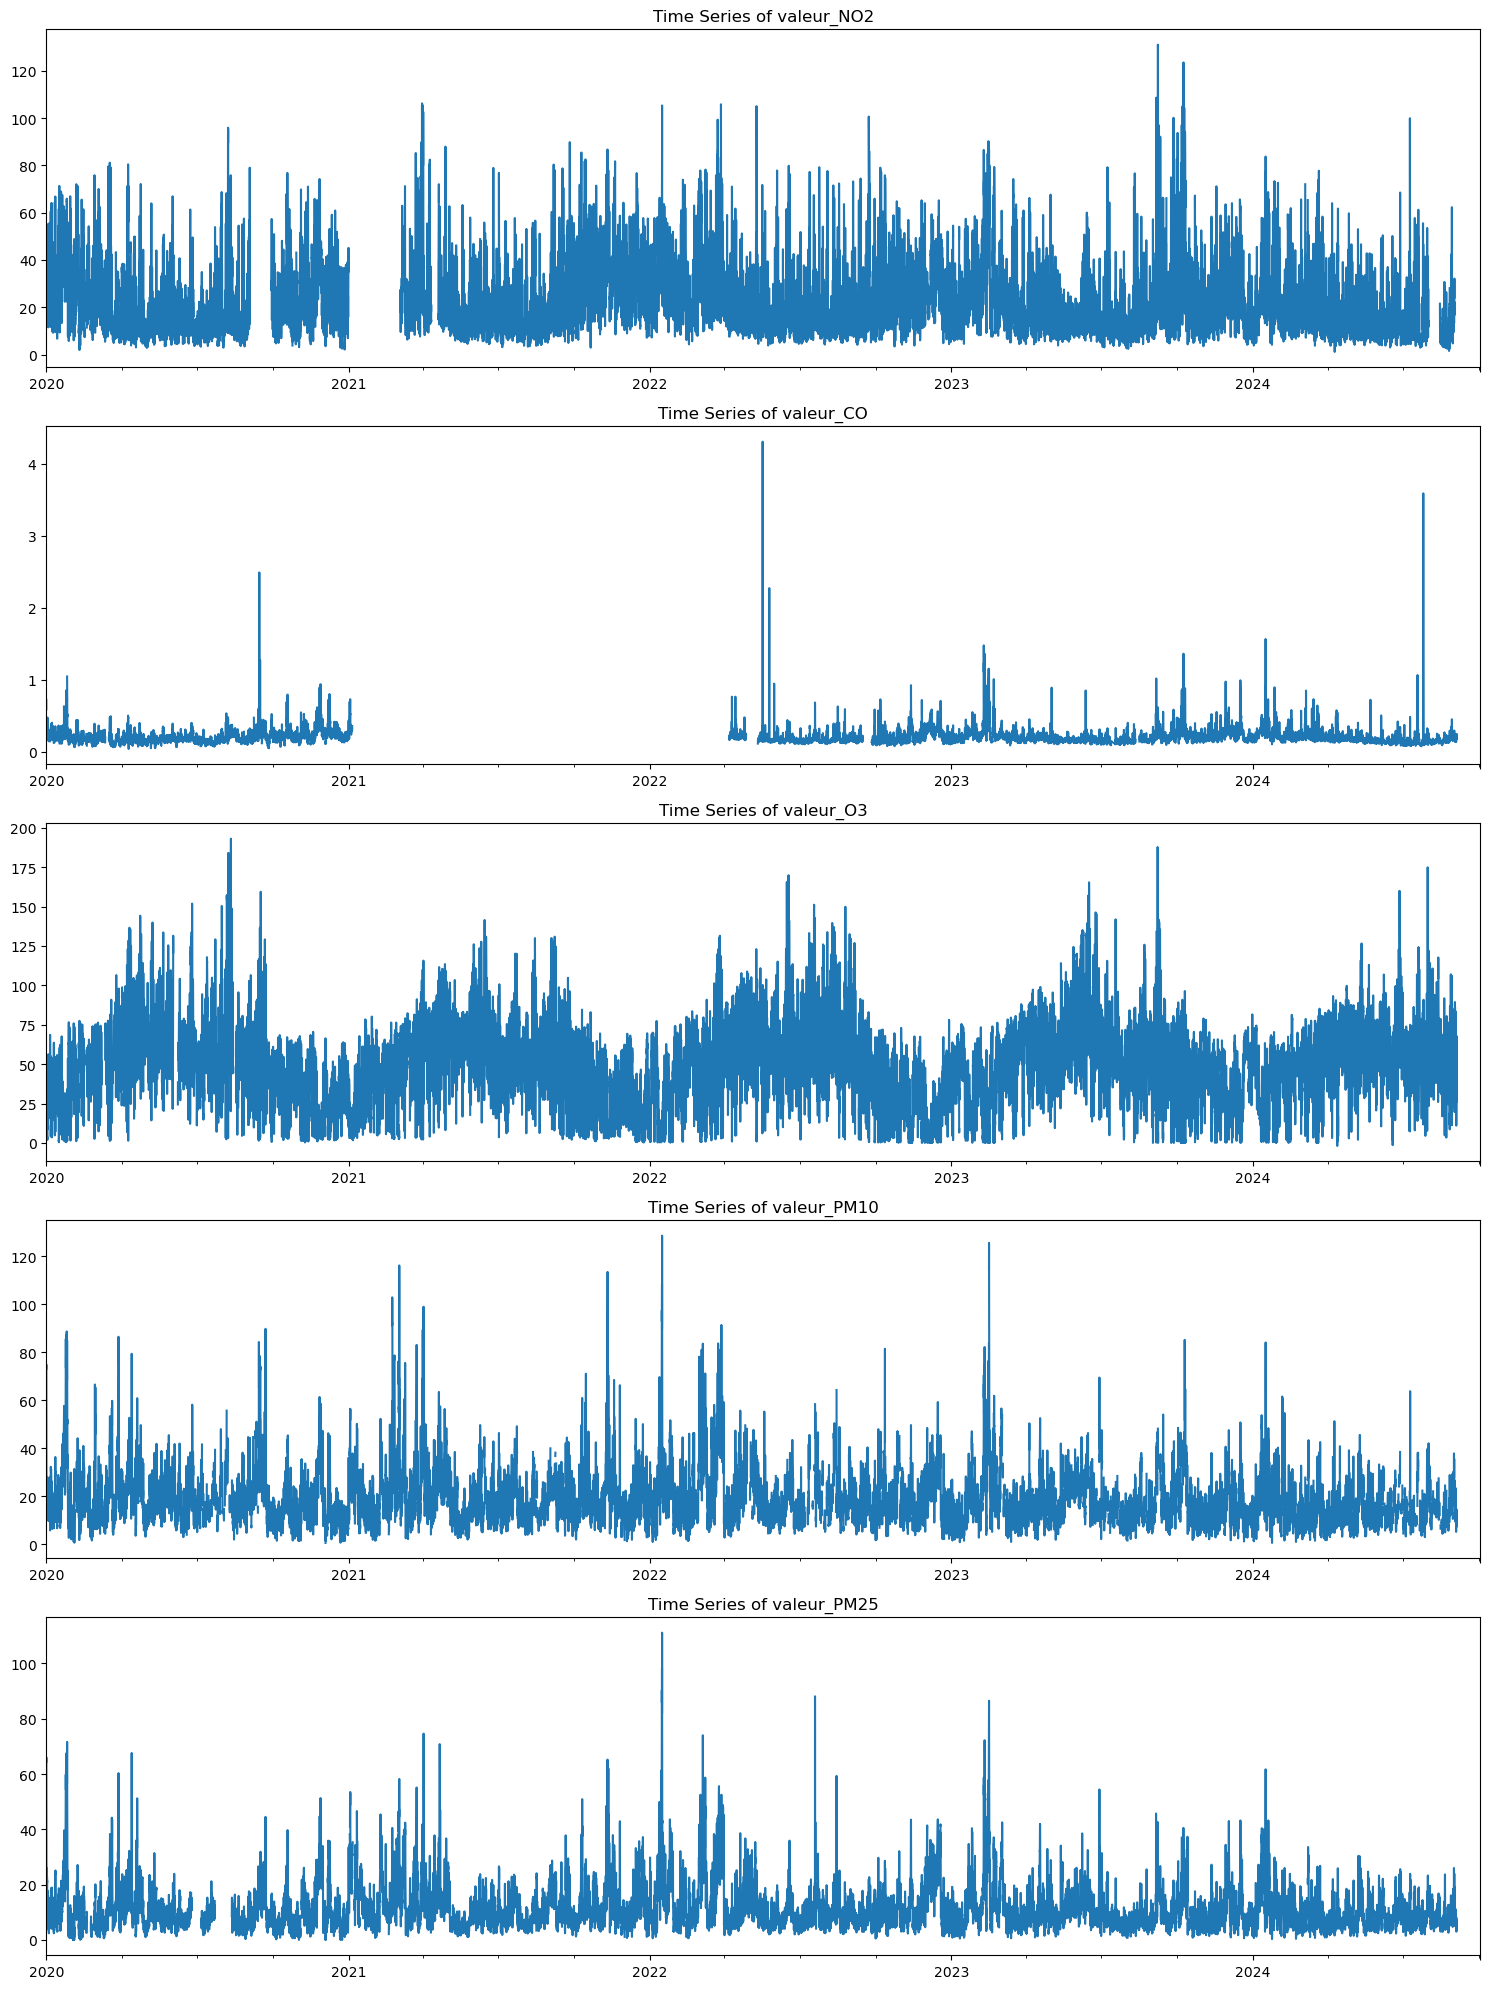

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

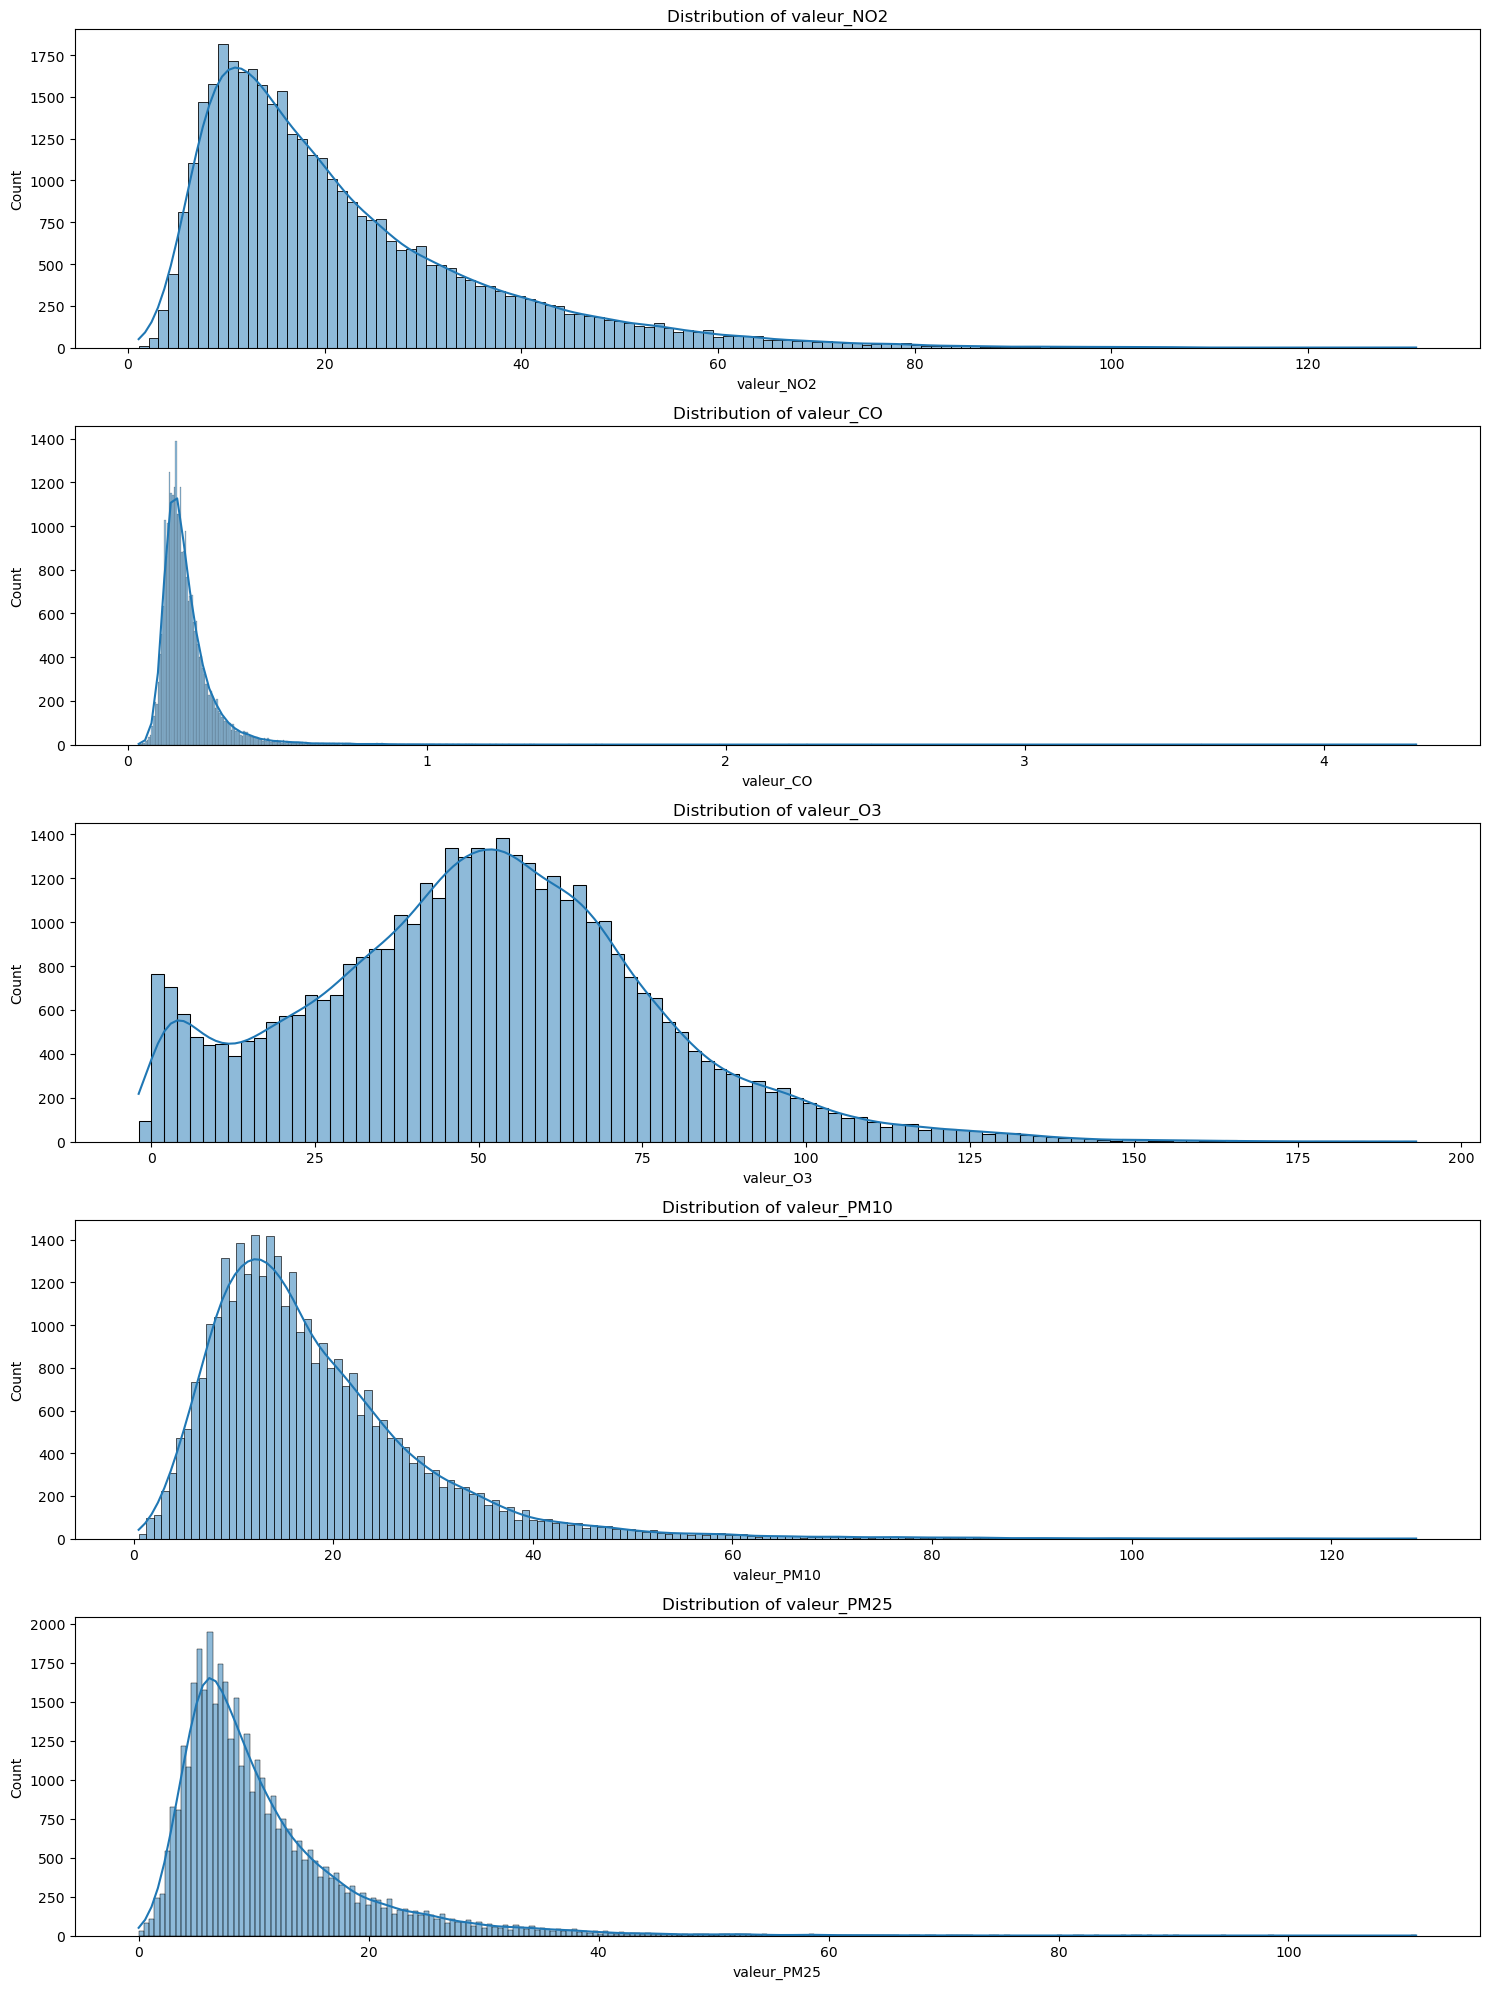

In [7]:
# Plot time series for each pollutant
fig, axes = plt.subplots(5, 1, figsize=(15, 20))
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

for i, pollutant in enumerate(pollutants):
    df[pollutant].plot(ax=axes[i])
    axes[i].set_title(f'Time Series of {pollutant}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

# Distribution plots for each pollutant
fig, axes = plt.subplots(5, 1, figsize=(15, 20))

for i, pollutant in enumerate(pollutants):
    sns.histplot(df[pollutant], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {pollutant}')

plt.tight_layout()
plt.show()

We have missing values for NO2 and CO. Plus, distribution looks normal for all variables to predict.

In [14]:
# pip install qolmat

  Obtaining dependency information for qolmat from https://files.pythonhosted.org/packages/c4/65/1389affead8485bbf351f3bc32ebaf869cfef1bc09d8073f1e0f27a5595b/qolmat-0.1.8-py3-none-any.whl.metadata
  Obtaining dependency information for category-encoders from https://files.pythonhosted.org/packages/98/47/598b4bf0ccf6f02915e71bdd23fe846a27adc2d3ba734f2ba5215d8e44f5/category_encoders-2.6.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for dcor>=0.6 from https://files.pythonhosted.org/packages/45/f3/49770c523067d2179a600f236ea6d55f0a02909a424d055dbc50e04c4860/dcor-0.6-py3-none-any.whl.metadata
  Obtaining dependency information for hyperopt from https://files.pythonhosted.org/packages/b6/cd/5b3334d39276067f54618ce0d0b48ed69d91352fbf137468c7095170d0e5/hyperopt-0.2.7-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
    --------------------------------------- 0.3/16.4 MB 7.9 MB/s eta 0:00:03
   - ---------------------------

Using qolmat for imputing missing data

In [58]:
from qolmat.benchmark import comparator, missing_patterns
from qolmat.imputations import imputers
from qolmat.utils import data

In [71]:
# pip install fancyimpute

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/10/c9/f660f90f7b9c1dbfc70a36f253dde48ac96e671b5e996fe99ca92c79e16f/cvxpy-1.5.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cvxopt from https://files.pythonhosted.org/packages/a3/52/2237d72cf007e6c36367ab8a776388a9f13511e4cfa8a71b79101ad6e0fa/cvxopt-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for nose from https://files.pythonhosted.org/packages/15/d8/dd071918c040f50fa1cf80da16423af51ff8ce4a0f2399b7bf8de45ac3d9/nose-1.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/f8/7b/ec42030f389c1b2a7e5517d4ba4a169f1d8fb6f4beb92c5b457e0cc284e4/osqp-0.6.7.post3-cp311-cp311-w

In [8]:
import pandas as pd
import numpy as np
from fancyimpute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as SklearnIterativeImputer

numeric_columns = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Create an instance of IterativeImputer
imputer = SklearnIterativeImputer(random_state=0, max_iter=10, n_nearest_features=5)

# Fit the imputer and transform the data
imputed_array = imputer.fit_transform(df[numeric_columns])

# Create a new dataframe with imputed values
df_imputed = pd.DataFrame(imputed_array, columns=numeric_columns, index=df.index)

# Add back any non-numeric columns
for col in df.columns:
    if col not in numeric_columns:
        df_imputed[col] = df[col]

# Save the imputed dataset
df_imputed.to_csv('imputed_data.csv')

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Imputation complete. Imputed data saved to 'imputed_data.csv'

Column: valeur_NO2
Original missing: 3970
Original mean: 21.83
Imputed mean: 22.07

Column: valeur_CO
Original missing: 13202
Original mean: 0.20
Imputed mean: 0.21

Column: valeur_O3
Original missing: 1366
Original mean: 50.57
Imputed mean: 50.68

Column: valeur_PM10
Original missing: 7840
Original mean: 18.22
Imputed mean: 18.72

Column: valeur_PM25
Original missing: 2464
Original mean: 11.05
Imputed mean: 11.08

Missing values after imputation:


NameError: name 'imputed_df' is not defined

In [13]:
# # Define all columns to be imputed
# columns = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']
# # Choose imputation methods
# #method = imputers.ImputerEM(model="VAR", method="mle", max_iter_em=50, n_iter_ou=15, dt=1e-3, p=1)
# #method = imputers.ImputerInterpolation(method="linear")
# method = imputers.Imputer(groups=("id",))

# imputed_df = df.copy()
# for col in columns:
#     imputer = method
#     imputed_df[col] = imputer.fit_transform(df[[col]])

# # Verify the imputation
# print("\nMissing values after imputation:")

# # Save the imputed dataset
# imputed_df.to_csv('imputed_data.csv')

# print("\nImputed data saved to 'imputed_data.csv'")

0


Using the cleaned data to build a baseline

In [16]:
df_imputed = pd.read_csv('imputed_data.csv')

df_imputed.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9228\3123199255.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_imputed = pd.read_csv('imputed_data.csv')


,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),...,soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),date,is_holiday
0,2020-01-01 00:00:00,42.9,0.718000,15.7,73.1,64.4,-0.2,99,-0.3,-2.7,...,1.1,3.3,8.2,12.0,0.380,0.385,0.383,0.288,2020-01-01 00:00:00,True
1,2020-01-01 01:00:00,33.6,0.587000,10.1,74.8,66.0,2.6,98,2.3,0.3,...,1.8,4.1,8.2,12.0,0.382,0.386,0.383,0.288,2020-01-01 01:00:00,True
2,2020-01-01 02:00:00,29.3,0.446091,5.1,51.0,44.9,2.1,100,2.0,-0.3,...,2.2,4.0,8.2,12.0,0.382,0.386,0.383,0.288,2020-01-01 02:00:00,True
3,2020-01-01 03:00:00,30.5,0.246000,7.2,27.7,25.1,1.9,100,1.9,-0.7,...,2.4,4.0,8.2,12.0,0.382,0.386,0.383,0.288,2020-01-01 03:00:00,True
4,2020-01-01 04:00:00,29.3,0.204000,8.3,15.3,13.6,2.2,98,1.9,-0.7,...,2.6,4.0,8.2,12.0,0.382,0.386,0.383,0.288,2020-01-01 04:00:00,True


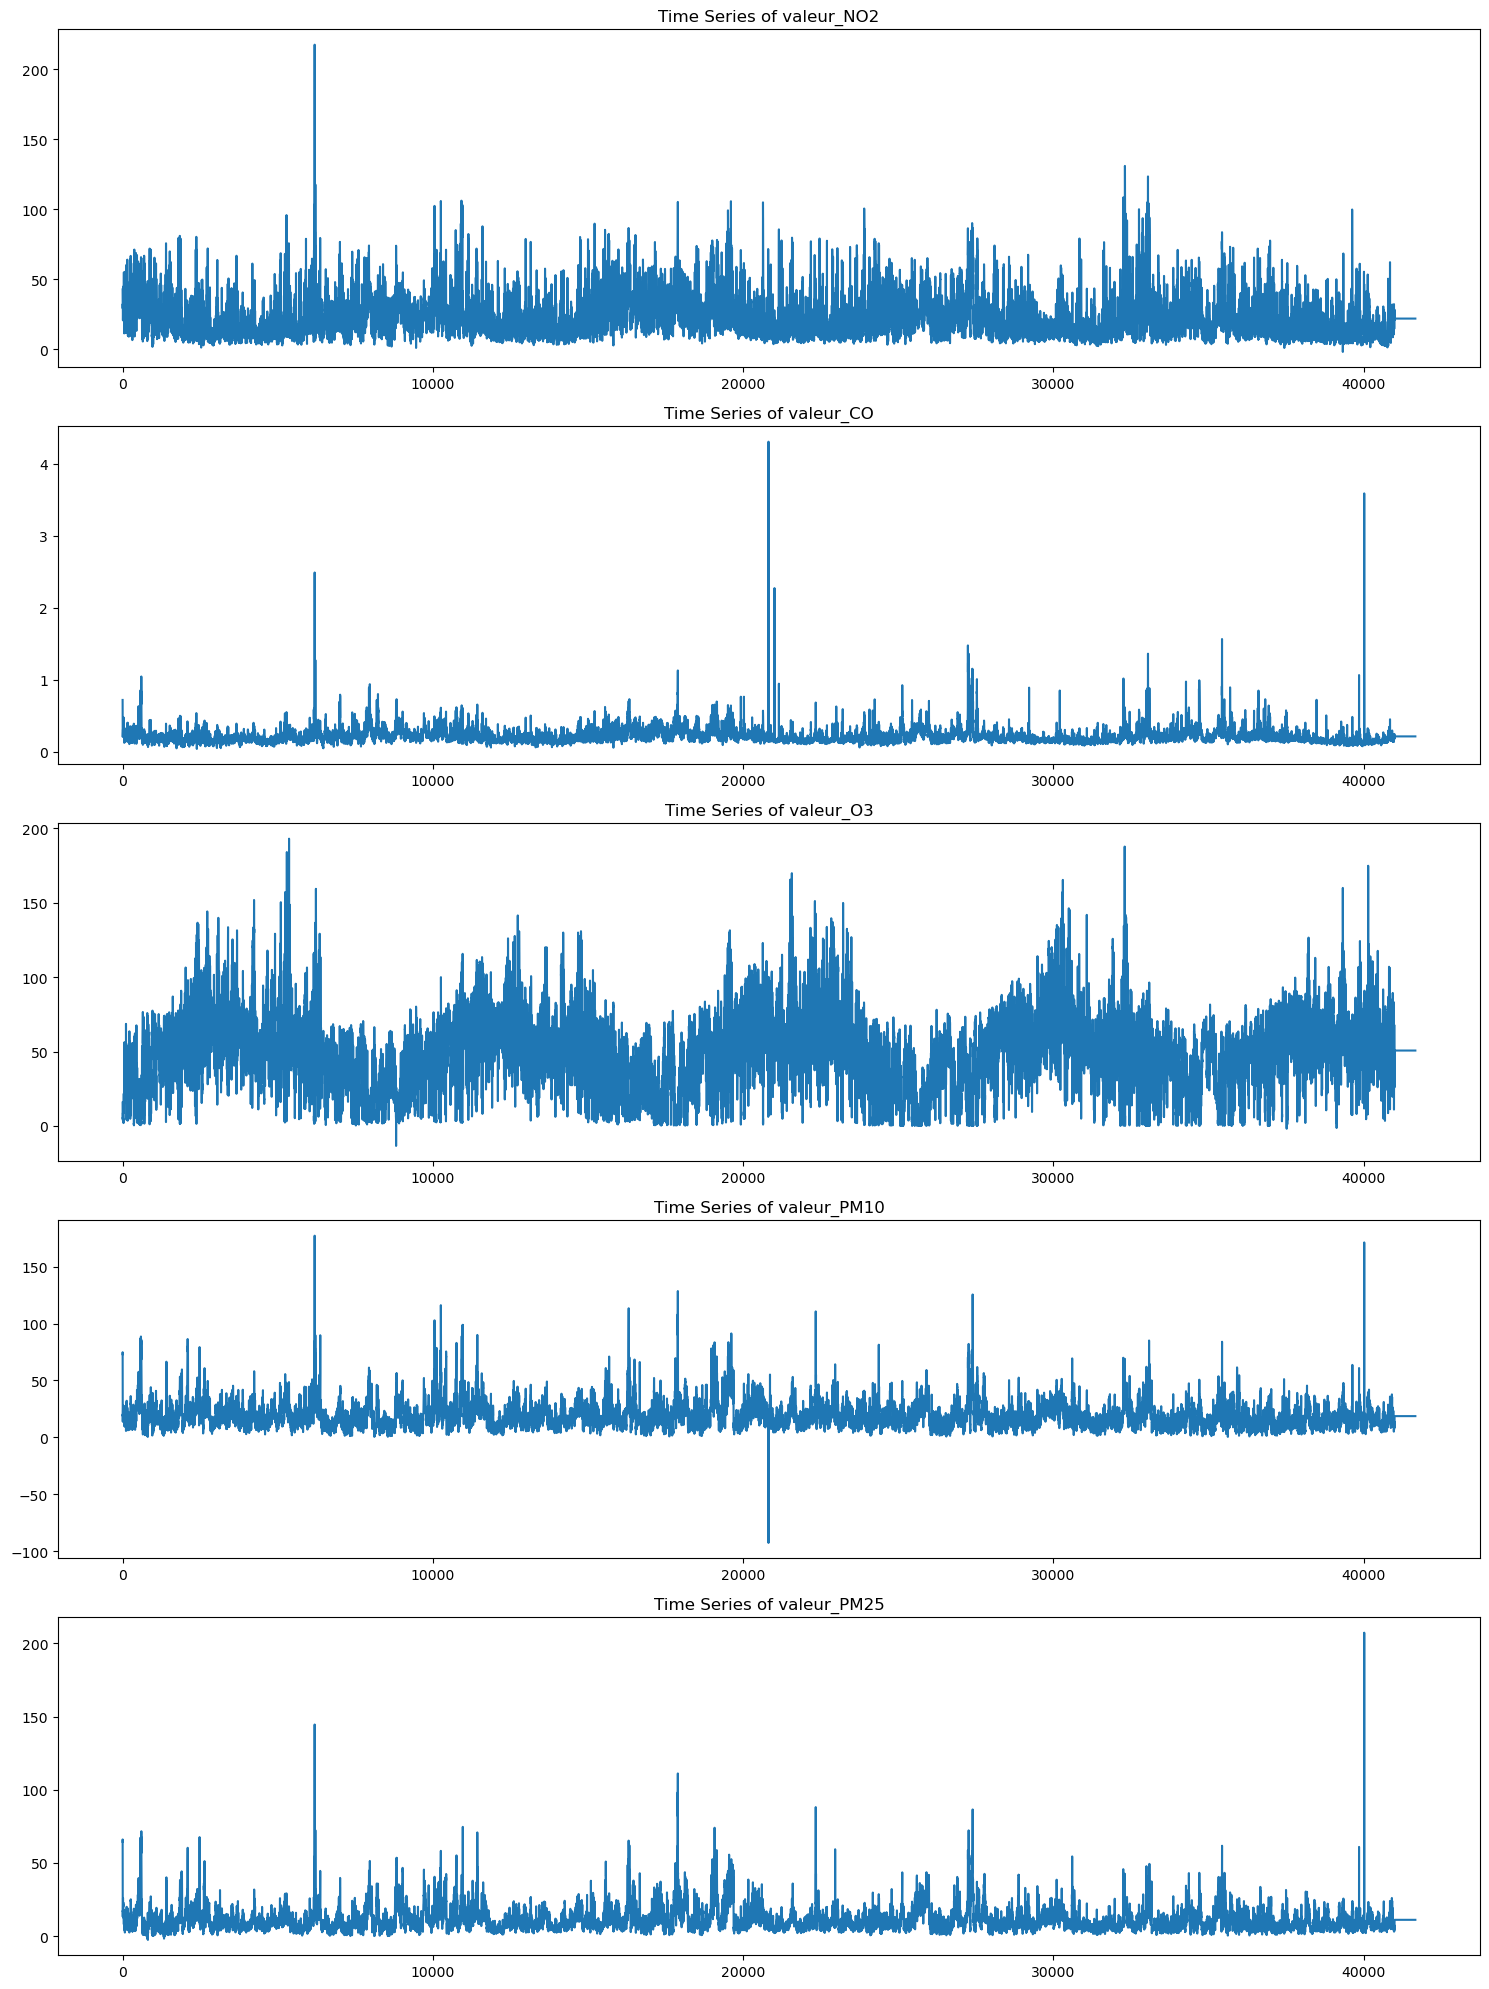

In [17]:
# Plot time series for each pollutant
fig, axes = plt.subplots(5, 1, figsize=(15, 20))
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

for i, pollutant in enumerate(pollutants):
    df_imputed[pollutant].plot(ax=axes[i])
    axes[i].set_title(f'Time Series of {pollutant}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


Lets build a baseline

In [30]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ------------- -------------------------- 204.8/614.7 kB 6.3 MB/s eta 0:00:01
   --------------------------------- ------ 512.0/614.7 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.8 MB 5.5 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.8 MB 5.3 MB/s eta 0:00:01
   --------- ------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
import matplotlib.pyplot as plt


In [32]:
# Define the variables to predict
variables = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']
# Function to evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, mae

##### Basic Models (Moving Average and ARIMA):

In [ ]:
df = pd.read_csv('paste.txt')
df['id'] = pd.to_datetime(df['id'])
df.set_index('id', inplace=True)

# Define the variables to predict
variables = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

In [34]:
# Create the test dataset
test_dates = pd.date_range(start='2024-09-03 23:00:00', end='2024-09-24 22:00:00', freq='H')
test_df = pd.DataFrame(index=test_dates, columns=variables)

# Function to apply exponential smoothing
def exponential_smoothing(series, alpha=0.3):
    return ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=24).fit(smoothing_level=alpha)

# Predict using Exponential Smoothing
for var in variables:
    print(f"Processing {var}")
    series = df[var].dropna()
    
    # Fit the model
    model = exponential_smoothing(series)
    
    # Make predictions
    predictions = model.forecast(len(test_df))
    
    # Assign predictions to test_df
    test_df[var] = predictions

# Save predictions to CSV
test_df.to_csv('exponential_smoothing_predictions.csv')

print("Predictions saved to 'exponential_smoothing_predictions.csv'")

Processing valeur_NO2
Processing valeur_CO
Processing valeur_O3
Processing valeur_PM10
Processing valeur_PM25

Results for valeur_NO2:
Moving Average: MSE = 105.7216, MAE = 7.1578

Results for valeur_CO:
Moving Average: MSE = 0.0064, MAE = 0.0402

Results for valeur_O3:
Moving Average: MSE = 284.6753, MAE = 12.9569

Results for valeur_PM10:
Moving Average: MSE = 38.9931, MAE = 4.5018

Results for valeur_PM25:
Moving Average: MSE = 17.0178, MAE = 2.8601
